In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/333-dataset/all_call_stages.csv')
print(data.head())

/tmp/ipykernel_30/2254765088.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/333-dataset/all_call_stages.csv')


   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila        municipality ward mauza village location comments  \
0             NaN                 NaN  NaN   NaN     NaN      NaN      NaN   
1   Sherpur Sadar  Sherpur Pourasabha  NaN   NaN     NaN      NaN      NaN   
2           Titas                 NaN  NaN   NaN     NaN      NaN      NaN   
3  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   
4  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   

                                pcqc                scqc  \
0  No Response and Disconnected Call  Mute Or Blank Call   
1  No Response

In [220]:
# Display basic information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833671 entries, 0 to 1833670
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   gender                 object 
 2   physically_challenged  object 
 3   division               object 
 4   district               object 
 5   city                   object 
 6   upazila                object 
 7   municipality           object 
 8   ward                   object 
 9   mauza                  object 
 10  village                object 
 11  location               object 
 12  comments               object 
 13  pcqc                   object 
 14  scqc                   object 
 15  call_type              object 
 16  answered_at            object 
 17  call_duration_min      float64
 18  event_date             object 
dtypes: float64(1), int64(1), object(17)
memory usage: 265.8+ MB
None


In [221]:
data.shape

(1833671, 19)

### Data Clean

In [222]:
# Drop colloums
data = data.drop(['municipality','ward','mauza','village','location','comments'], axis=1)

In [223]:
# Changed Date time to adjust GMT
data['answered_at'] = pd.to_datetime(data['answered_at'])
data['answered_at'] = data['answered_at'] + pd.Timedelta(hours=6)

In [224]:
print(data.head())

   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila                               pcqc                scqc  \
0             NaN  No Response and Disconnected Call  Mute Or Blank Call   
1   Sherpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
2           Titas  No Response and Disconnected Call  Mute Or Blank Call   
3  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
4  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type         answered_at  call_duration_min  \
0  No Response and Disconnected Call 2024-01-01 05:56:50           

In [225]:
data.dropna(subset=['gender'], inplace=True) 
data.dropna(subset=['answered_at'], inplace=True) 
data = data.sort_values('answered_at')
data = data.iloc[60:].reset_index(drop=True)

In [226]:
data.shape

(1217243, 13)

In [227]:
print(data.head())

              id  gender physically_challenged    division     district city  \
1217238  1875435    Male                   Yes      Sylhet  Moulvibazar  NaN   
1217239  1876142    Male                    No       Dhaka      Tangail  NaN   
1217240  1875436    Male                    No      Sylhet     Habiganj  NaN   
1217241  1876870    Male                    No      Sylhet     Habiganj  NaN   
1217242  1876579  Female                    No  Chittagong     Noakhali  NaN   

           upazila                     pcqc  \
1217238   Rajnagar          Phone Directory   
1217239   Mirzapur          Phone Directory   
1217240  Madhabpur          Phone Directory   
1217241  Madhabpur          Phone Directory   
1217242  Begumganj  Helplines Info. (Query)   

                                                scqc call_type  \
1217238  Phone-Directory (Fire, Ambulance or Police)   Queries   
1217239                        Police_Inspector (OC)   Queries   
1217240  Phone-Directory (Fire, Ambula

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Removed unnecessary columns as they will not be useful for analysis.</div>

In [228]:
# import pandas as pd
# import math

# # Number of rows per file 
# rows_per_file = 610000

# # Calculate the number of files needed
# num_files = math.ceil(len(data) / rows_per_file)

# # Split and save the DataFrame
# for i in range(num_files):
#     start_idx = i * rows_per_file
#     end_idx = min((i + 1) * rows_per_file, len(data))
    
#     # Get the chunk of data
#     chunk = data.iloc[start_idx:end_idx]
    
#     # Create the filename with index
#     filename = f'call_stages_part_{i+1}.csv'
    
#     # Save to CSV
#     chunk.to_csv(filename, index=False)
#     print(f'Saved {filename} with {len(chunk)} rows')

# print(f'\nTotal files created: {num_files}')

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Above code can be used if we want to see data in CSV files as it can only show 10,00,000 data at a time. </div>

### Call Type By District

In [229]:
caller_type_district = data.groupby(['district', 'call_type']).size().unstack(fill_value=0)
caller_type_district

call_type,Application Assistance,Complain,Complaint Customer Experience,Complaints,Emergency Assistance,Helpline,Incomplete_Complaints,Ministry of Disaster Management and Relief(modmr),No Response and Disconnected Call,Prank Call,Queries,Query
district,,,,,,,,,,,,
Bagerhat,0,3,0,111,4,346,37,0,2196,231,4809,0
Bandarban,1,0,0,13,1,87,13,0,660,61,1163,0
Barguna,1,3,0,82,2,229,25,1,1583,97,3081,0
Barisal,2,0,0,187,6,637,80,0,4613,453,9394,1
Bhola,0,4,0,113,16,484,63,0,3649,225,6655,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Sirajganj,1,0,0,308,12,542,60,0,7549,229,11753,2
Sunamganj,1,0,0,253,3,437,78,0,3239,168,5191,0
Sylhet,0,0,0,2659,6,1240,321,0,9382,605,16784,2


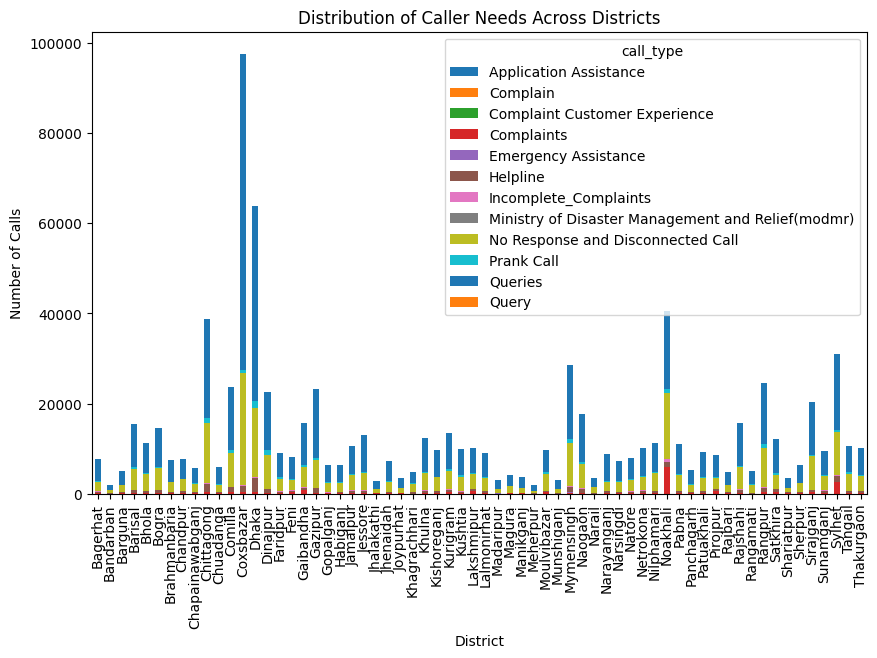

In [230]:
caller_type_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

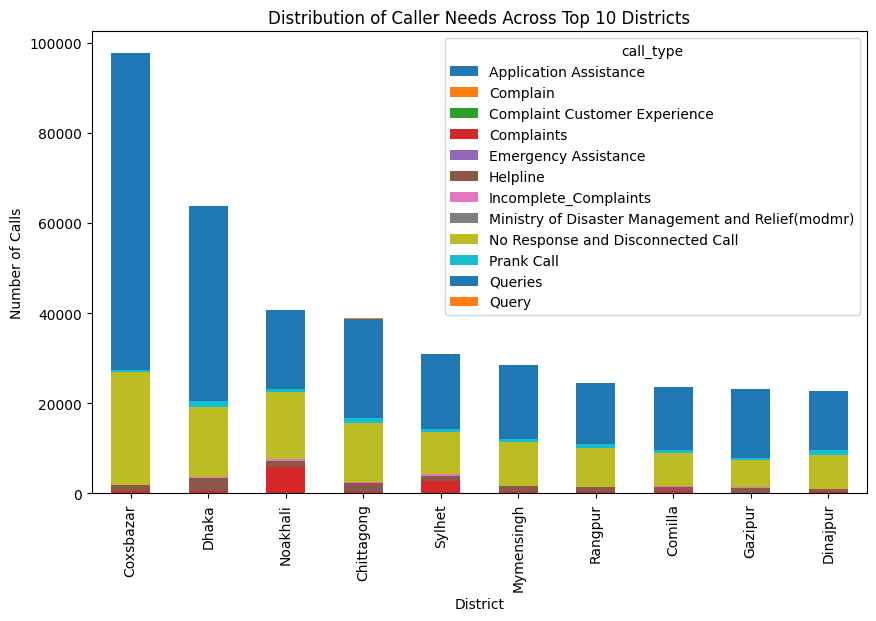

In [231]:
# Show only the top 10 districts by call volume
top_districts = caller_type_district.sum(axis=1).nlargest(10).index
filtered_data = caller_type_district.loc[top_districts]

# Plot the filtered data
filtered_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Top 10 Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Shows the distribution among the districts based on call types. The stacked bar chart shows the top 10 districts with the most calls. </div>

### Analysis of Unrelated Calls

In [232]:
# Count the number of occurrences for three conditions
query_not_related_count = data[data['pcqc'].isin(["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"])].shape[0]

# Print the result
print("Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call':", query_not_related_count)

Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call': 687071


In [233]:
# Percentage of "Query Not Related To 333 Service"
total_queries = data.shape[0]
percentage_not_related = (query_not_related_count / total_queries) * 100
print(f"Percentage of 'Query Not Related To 333 Service': {percentage_not_related:.2f}%")

Percentage of 'Query Not Related To 333 Service': 56.44%


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>The Unrelated calls consist of Query Not Related To 333 Service, No Response or Disconnected Call, and Prank Call. We can see that more than half of the calls are unrelated with 56.43% of calls. </div>

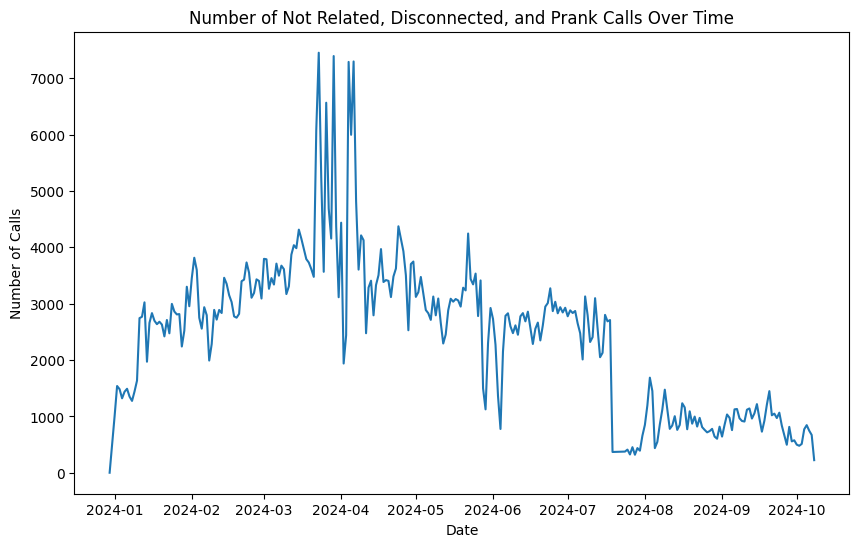

In [234]:
data['answered_at'] = pd.to_datetime(data['answered_at'])

# Filter rows where 'pcqc' is either "Query Not Related To 333 Service", "No Response and Disconnected Call", or "Prank Call"
not_related_df = data[data['pcqc'].isin(["Query Not Related To 333 Service", 
                                         "No Response and Disconnected Call", 
                                         "Prank Call"])]

# Group by the date part of 'answered_at' and count occurrences
calls_over_time = not_related_df.groupby(not_related_df['answered_at'].dt.date).size()

# Plotting the line chart
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Number of Not Related, Disconnected, and Prank Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")

# Show the plot 
plt.show()

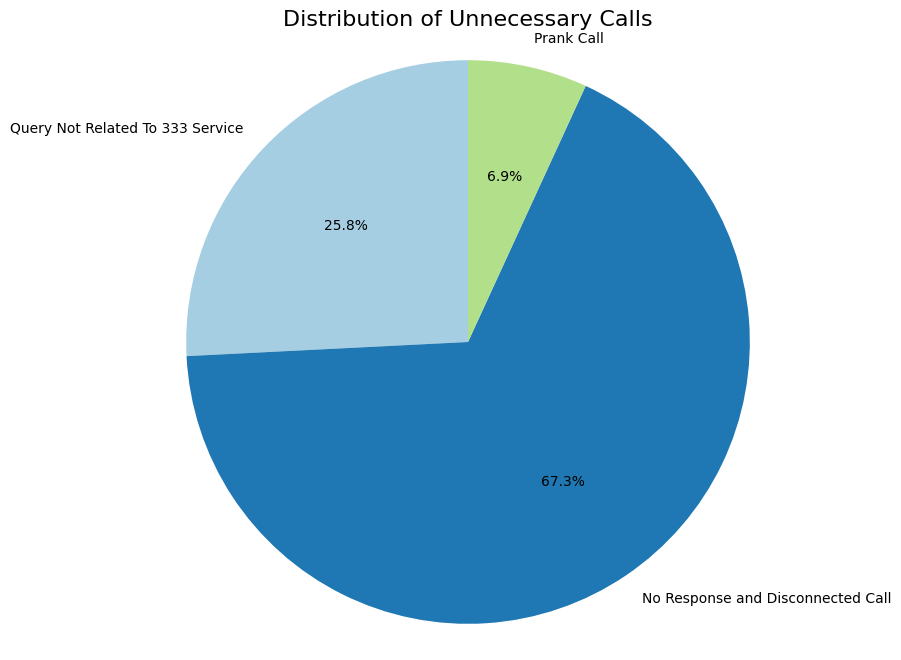

In [235]:
# Count the number of each type of unnecessary call
counts = data['pcqc'].value_counts().reindex(
    ["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"],
    fill_value=0
)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Unnecessary Calls', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color: black;
                                                 border-color: black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>The Distribution of unnecessary calls shows that most are No Response and Disconnected Calls with 67.3% of calls.</div>

### Gender Based Analysis

In [236]:
# Count the number of males and females
gender_count = data['gender'].value_counts()
print(gender_count)
# Calculate percentage
gender_percentage = (gender_count / gender_count.sum()) * 100
print(gender_percentage)

gender
Male      984295
Female    232948
Name: count, dtype: int64
gender
Male      80.862654
Female    19.137346
Name: count, dtype: float64


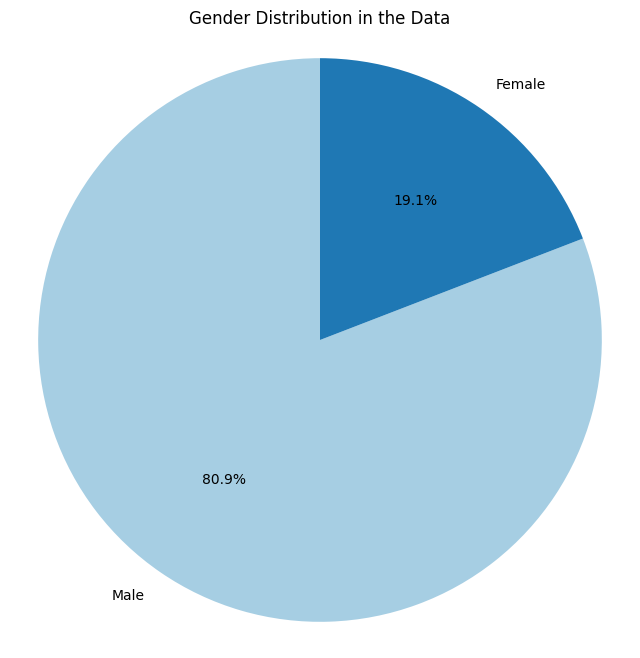

In [237]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Gender Distribution in the Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Most calls are from males with 80.0% being male whereas 19.1% being female.</div>

### Trends in the number of calls over time

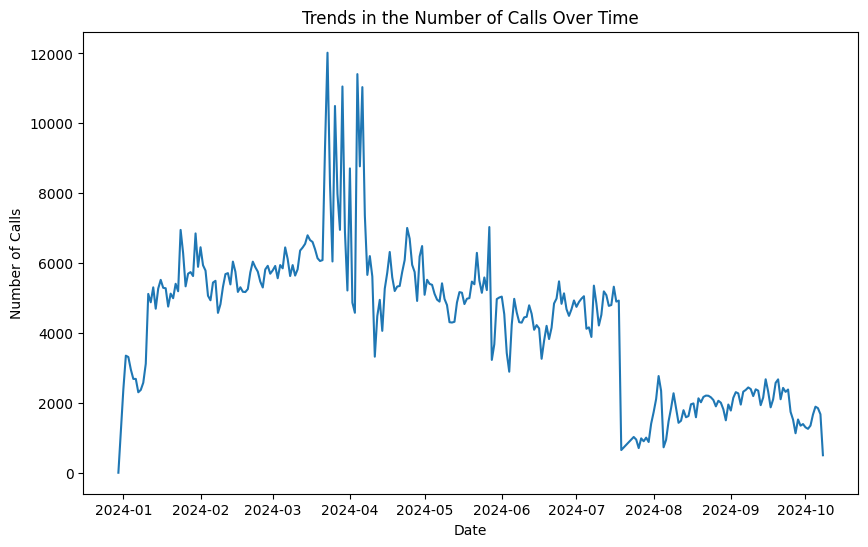

In [238]:
# Group by the date part of 'answered_at' and count the number of calls
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce') 
calls_over_time = data.groupby(data['answered_at'].dt.date).size()

# Plotting the line chart
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Trends in the Number of Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.show()

### Analysis of Call Types

In [239]:
# Count the number of occurrences of each call type
call_type_count = data['call_type'].value_counts()
print(call_type_count)
print("--------------------------------------------------------------")
# Calculate the percentage of each call type
call_type_percentage = (call_type_count / call_type_count.sum()) * 100
print("Percentage of call types")
print(call_type_percentage)

call_type
Queries                                              649886
No Response and Disconnected Call                    462694
Helpline                                              44546
Prank Call                                            34765
Complaints                                            19285
Incomplete_Complaints                                  5421
Emergency Assistance                                    271
Complain                                                203
Application Assistance                                   88
Query                                                    70
Complaint Customer Experience                            12
Ministry of Disaster Management and Relief(modmr)         2
Name: count, dtype: int64
--------------------------------------------------------------
Percentage of call types
call_type
Queries                                              53.389997
No Response and Disconnected Call                    38.011638
Helpline            

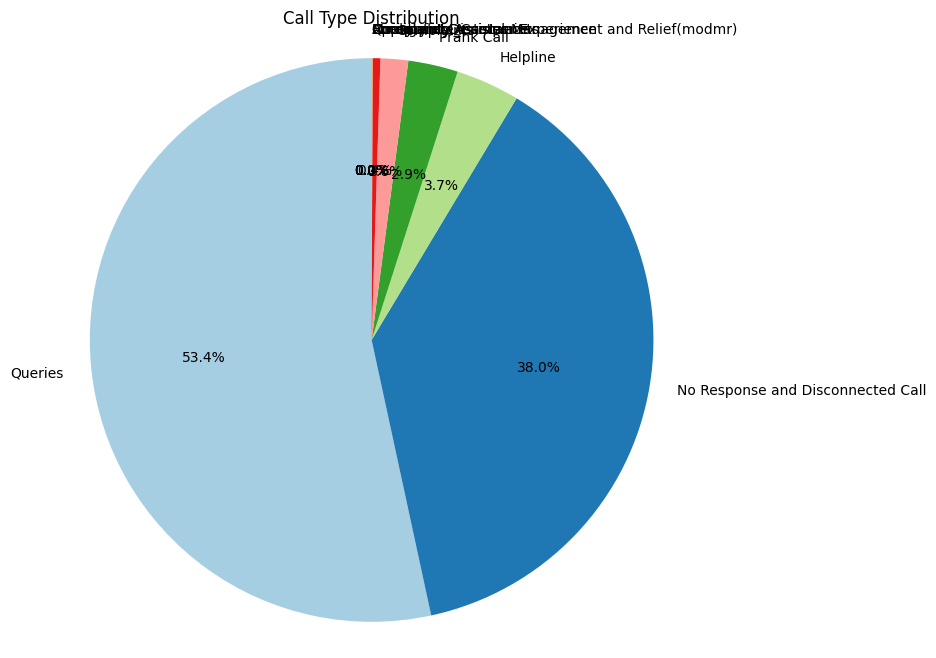

In [240]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(call_type_percentage, labels=call_type_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Call Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

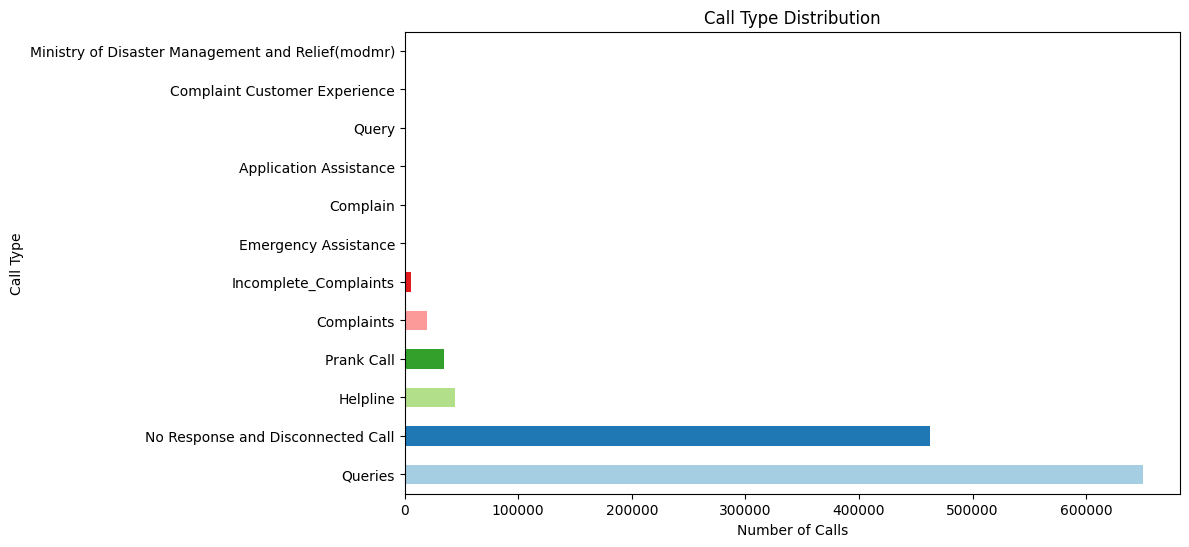

In [241]:
call_type_count.plot(kind='barh', figsize=(10, 6), color=plt.cm.Paired.colors)
plt.title('Call Type Distribution')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Analysis of call types shows that most of the calls are queries followed by disconnected or no response calls and helplines. </div>

### Number of Calls based on time segment

time_segment
Afternoon (5 PM - 9 PM)      327643
Late Night (12 AM - 5 AM)    342341
Morning (5 AM - 12 PM)        68628
Night (9 PM - 12 AM)         228554
Noon (12 PM - 5 PM)          250077
Name: count, dtype: int64


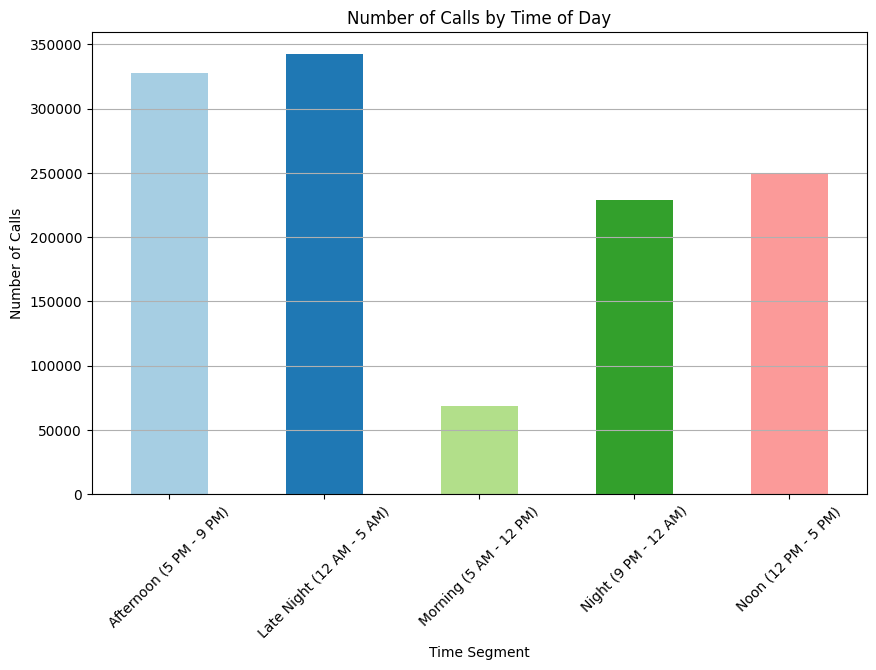

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'answered_at' to datetime
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce')

# Extract the hour from the 'answered_at' column
data['hour'] = data['answered_at'].dt.hour

# Define time segments
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Noon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Afternoon (5 PM - 9 PM)'
    elif 21 <= hour < 24:
        return 'Night (9 PM - 12 AM)'
    else:
        return 'Late Night (12 AM - 5 AM)'

# Apply the categorization function
data['time_segment'] = data['hour'].apply(categorize_time)

# Count the number of calls in each time segment
calls_by_time_segment = data['time_segment'].value_counts().sort_index()
print(calls_by_time_segment) 
# Plotting the results
plt.figure(figsize=(10, 6))
calls_by_time_segment.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Number of Calls by Time of Day')
plt.xlabel('Time Segment')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Used time segment to check when the most calls come and when the least call comes. Late night and Afternoon have the most amount of calls whereas Morning has the least amount of calls.  </div>

### Dropping some specific rows because of Disaster

In [243]:
data['answered_at'] = pd.to_datetime(data['answered_at'])

# Define the start and end date
start_date = '2024-08-23'
end_date = '2024-09-17'

# Filter the data between 23 August 2024 and 17 September 2024
filtered_data = data[(data['answered_at'] >= start_date) & 
                     (data['answered_at'] <= end_date)]

# Drop rows where 'scqc' contains 'Disaster'
filtered_data = filtered_data[~filtered_data['scqc'].str.contains('Disaster', case=False, na=False)]

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Removed Disaster data rows located in scqc for predicting anomaly.</div>

In [244]:
data['call_duration_min'] = pd.to_numeric(data['call_duration_min'], errors='coerce')

# Create a new column 'anomaly' and mark calls less than 0.50 (30 seconds) as 1, others as 0
data['anomaly'] = (data['call_duration_min'] < 0.33).astype(int)

# Display the first few rows to check the new 'anomaly' column
print(data[['call_duration_min', 'anomaly']].head(20))

    call_duration_min  anomaly
0                3.00        0
1                3.00        0
2                3.00        0
3                3.00        0
4                0.27        1
5                5.98        0
6                0.58        0
7                0.10        1
8                0.35        0
9                1.08        0
10               1.30        0
11               0.30        1
12               0.00        1
13               2.40        0
14               0.13        1
15               0.92        0
16               0.27        1
17               0.07        1
18               0.00        1
19               1.43        0


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
color:black;
border-color:black;
border-radius:5px;
width:60%;
margin: auto;
text-align: left;">
<b>Note: </b>Considering calls less than 20 seconds as an anomaly.</div>

In [245]:
# Count the number of anomalies (sum of 'anomaly' column)
num_anomalies = data['anomaly'].sum()
# Display the result
print(f"Number of anomalies: {num_anomalies}")
data.head()

Number of anomalies: 404383


,id,gender,physically_challenged,division,district,city,upazila,pcqc,scqc,call_type,answered_at,call_duration_min,event_date,hour,time_segment,anomaly
0,106726,Female,No,Dhaka,Gazipur,NaN,Sreepur,Query Not Related To 333 Service,Query Not Related To 333 Service,Queries,2023-12-30 19:35:48,3.00,2024-01-20,19,Afternoon (5 PM - 9 PM),0
1,101688,Female,No,Chittagong,Coxsbazar,NaN,Maheshkhali,Complaints,Women Persecution and Dowry,Complaints,2023-12-30 19:35:48,3.00,2024-01-19,19,Afternoon (5 PM - 9 PM),0
2,1520036,Male,No,Sylhet,Sylhet,NaN,Gowainghat,Complaints,Disaster,Complaints,2023-12-30 19:35:48,3.00,2024-07-04,19,Afternoon (5 PM - 9 PM),0
3,1402096,Female,No,Dhaka,Gazipur,NaN,Sreepur,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2023-12-30 19:35:48,3.00,2024-06-18,19,Afternoon (5 PM - 9 PM),0
4,307,Male,Yes,Rangpur,Rangpur,NaN,Badarganj,Prank Call,Prank Call,Prank Call,2024-01-01 05:51:03,0.27,2024-01-01,5,Morning (5 AM - 12 PM),1


In [256]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert 'answered_at' to datetime
data['answered_at'] = pd.to_datetime(data['answered_at'])

# Extract datetime features
data['hour'] = data['answered_at'].dt.hour
data['day'] = data['answered_at'].dt.day
data['month'] = data['answered_at'].dt.month
data['day_of_week'] = data['answered_at'].dt.dayofweek

# Extract time-based features
data['minute'] = data['answered_at'].dt.minute
data['time_of_day'] = pd.cut(data['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
data.head()

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['gender', 'physically_challenged', 'division', 'district', 'upazila', 'pcqc', 'scqc', 'call_type', 'time_segment', 'time_of_day']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col].astype(str))

# Select features for the model
features = ['gender', 'physically_challenged', 'division', 'district', 'upazila', 'pcqc', 'scqc', 'call_type', 
            'hour', 'day', 'month', 'day_of_week', 'minute', 'time_of_day']

X = data[features]
y = data['anomaly'] 
# Calculate time since previous call
data['time_since_previous'] = data['answered_at'].diff().dt.total_seconds() / 60  # in minutes
data['time_since_previous'] = data['time_since_previous'].fillna(0)

# Function to train model and get accuracy for a specific month
def get_month_accuracy(train_data, test_data, features):
    X_train = train_data[features]
    y_train = train_data['anomaly']
    X_test = test_data[features]
    y_test = test_data['anomaly']
    
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Get unique year-month combinations
data['year_month'] = data['answered_at'].dt.to_period('M')
unique_months = sorted(data['year_month'].unique())


accuracies = []
for i, month in enumerate(unique_months):
    if i == 0:  # Skip the first month as we need some data to train on
        continue
    train_data = data[data['year_month'] < month]
    test_data = data[data['year_month'] == month]
    accuracy = get_month_accuracy(train_data, test_data, features)
    accuracies.append((month, accuracy))

# Print average accuracy
avg_accuracy = np.mean(acc_scores)
print(f"\nAverage accuracy across all months: {avg_accuracy:.4f}")

# Print accuracies for each month
print("\nAccuracies for each month:")
for month, accuracy in accuracies:
    print(f"{month}: {accuracy:.4f}")
    


Average accuracy across all months: 0.8443

Accuracies for each month:
2024-01: 0.6764
2024-02: 0.8667
2024-03: 0.8538
2024-04: 0.8472
2024-05: 0.8594
2024-06: 0.8540
2024-07: 0.8633
2024-08: 0.8671
2024-09: 0.8733
2024-10: 0.8790


In [ ]:
# # Split the data based on time
# last_month = data['answered_at'].max() - pd.DateOffset(months=1)
# train_data = data[data['answered_at'] <= last_month]
# test_data = data[data['answered_at'] > last_month]

# X_train = train_data[features]
# y_train = train_data['anomaly']
# X_test = test_data[features]
# y_test = test_data['anomaly']

# print(f"Training data shape: {X_train.shape}")
# print(f"Testing data shape: {X_test.shape}")

# # Initialize and train the XGBoost model
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Feature importance
# feature_importance = model.feature_importances_
# feature_importance_dict = dict(zip(features, feature_importance))
# sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# print("\nFeature Importance:")
# for feature, importance in sorted_features:
#     print(f"{feature}: {importance}")

# # Calculate accuracy
# accuracy = (y_pred == y_test).mean()
# print(f"\nAccuracy on the last month of data: {accuracy:.4f}")
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy:.4f}")

In [247]:
import category_encoders as ce
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


X = data.drop(columns=['id', 'city', 'anomaly', 'call_duration_min', 'upazila', 'answered_at', 'event_date'])
y = data['anomaly']  # Target variable

# Convert categorical columns to 'category' dtype
categorical_columns = ['gender', 'physically_challenged', 'division', 'district', 'pcqc', 'scqc', 'call_type', 'time_segment']
for col in categorical_columns:
    X[col] = X[col].astype('category')

encoder = ce.TargetEncoder(cols=categorical_columns)
X_encoded = encoder.fit_transform(X, y)  # Fit the encoder and transform the categorical columns
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, enable_categorical=True)  # Enable categorical handling
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

xgb_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({
    'feature': X_encoded.columns,  
    'importance': xgb_importances
})

print(xgb_importance_df.sort_values(by='importance', ascending=False)) 

Accuracy: 0.8642
                  feature  importance
6               call_type    0.887027
4                    pcqc    0.085302
5                    scqc    0.007202
8            time_segment    0.005478
1   physically_challenged    0.003917
10                  month    0.001892
7                    hour    0.001677
3                district    0.001558
13            time_of_day    0.001477
0                  gender    0.001327
2                division    0.001185
9                     day    0.000813
11            day_of_week    0.000598
12                 minute    0.000547


08:26:09 - cmdstanpy - INFO - Chain [1] start processing
08:26:09 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


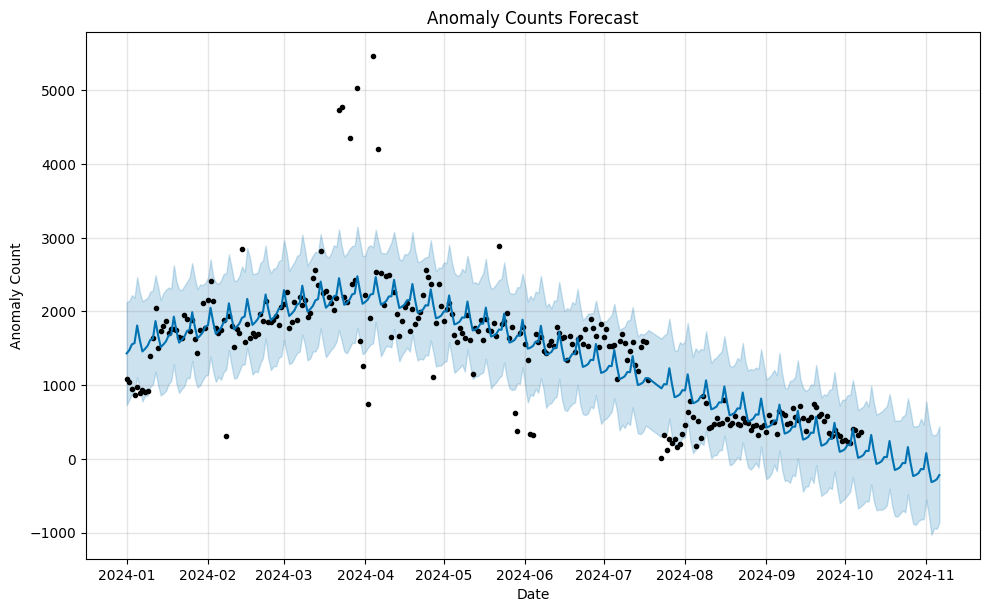

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


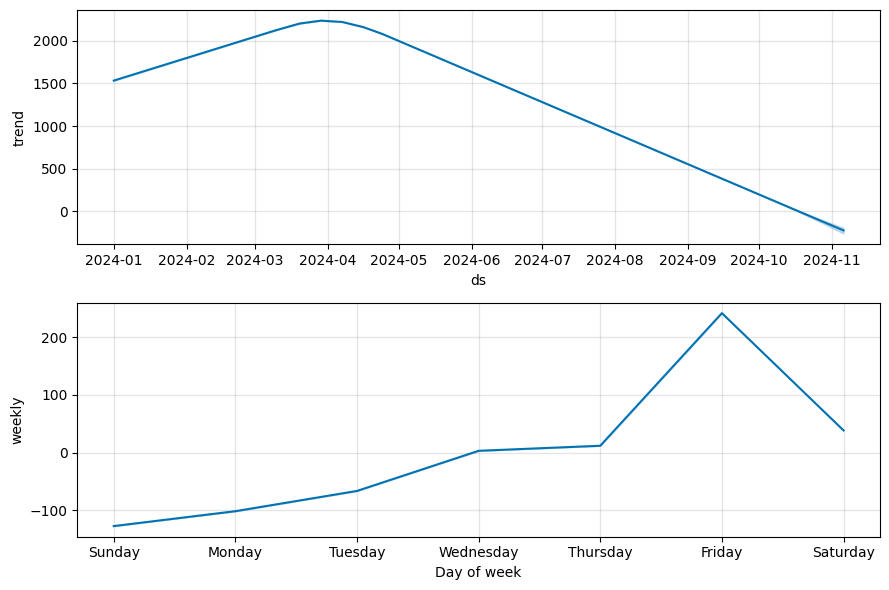

In [248]:
from prophet import Prophet
# Data Preparation
data['event_date'] = pd.to_datetime(data['event_date'])
anomaly_counts = data.groupby('event_date', as_index=False)['anomaly'].sum()

# Rename columns for Prophet
anomaly_counts.columns = ['ds', 'y'] 

# Initialize and fit the Prophet model
model = Prophet()
model.fit(anomaly_counts)

# Make future predictions
future = model.make_future_dataframe(periods=30) # Predicting for the next 30 days
forecast = model.predict(future)

# Step 4: Visualize the results
fig = model.plot(forecast)
plt.title("Anomaly Counts Forecast")
plt.xlabel("Date")
plt.ylabel("Anomaly Count")
plt.show()

# Plot components to analyze trend and seasonality
fig2 = model.plot_components(forecast)
plt.show()

In [249]:
# Show the forecast DataFrame for the next 30 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)  

,ds,yhat,yhat_lower,yhat_upper
277,2024-10-08,51.471079,-613.563418,709.915303
278,2024-10-09,109.344063,-573.484544,786.458903
279,2024-10-10,106.354672,-578.000584,707.802468
280,2024-10-11,324.619674,-343.485356,992.118246
281,2024-10-12,109.504643,-571.359871,764.606657
282,2024-10-13,-68.238504,-696.567329,599.310807
283,2024-10-14,-54.172216,-688.178365,620.537207
284,2024-10-15,-30.795490,-689.211124,640.672916
285,2024-10-16,27.077494,-671.813172,678.024356
286,2024-10-17,24.088103,-627.811531,715.992923
